<a href="https://colab.research.google.com/github/fatasa/PCD-Deteksi/blob/main/FeatureDetectionandTemplateMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Detection**

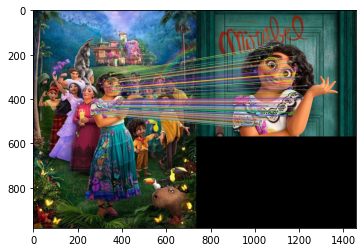

(<matplotlib.image.AxesImage at 0x7ff5727a4bd0>, None)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('full.jpg')          # gambar yang dituju
img2 = cv2.imread('mirabel.jpg')       # gambar yang dicari
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan
# BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None

# menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()

**Template Matching**

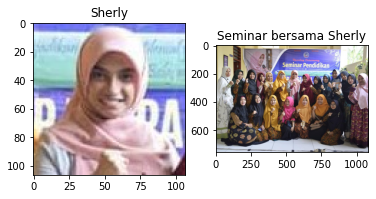

In [2]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt

# panggil dan konversi warna agar sesuai dengan Matplotlib
sherly = cv2.imread('sherly.png')
sherly =  cv2.cvtColor(sherly, cv2.COLOR_BGR2RGB) # simpan dengan nama yang sama = ditumpuk

# panggil dan konversi warna agar sesuai dengan Matplotlib
foto = cv2.imread('foto.png')
foto =  cv2.cvtColor(foto, cv2.COLOR_BGR2RGB) 

plt.subplot(121),plt.imshow(sherly), plt.title('Sherly')
plt.subplot(122),plt.imshow(foto), plt.title('Seminar bersama Sherly')
plt.show()

hasil metode cv2.TM_CCOEFF : 


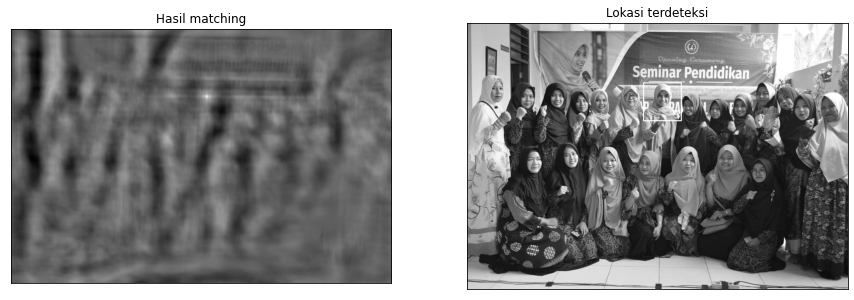

hasil metode cv2.TM_CCOEFF_NORMED : 


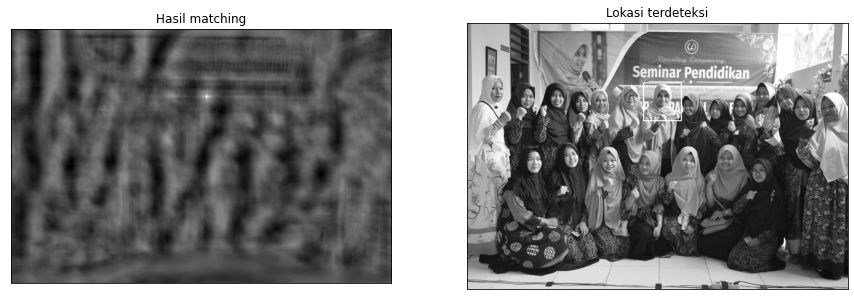

hasil metode cv2.TM_CCORR : 


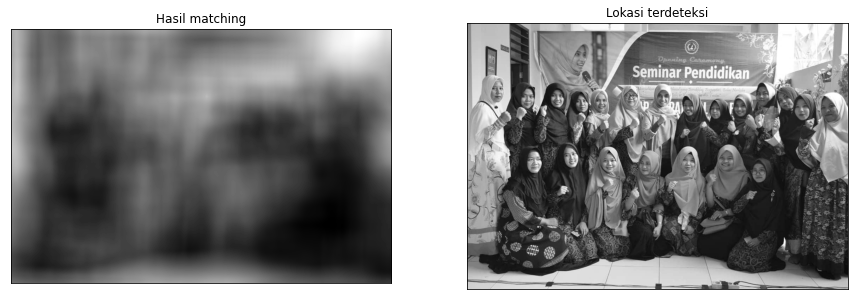

hasil metode cv2.TM_CCORR_NORMED : 


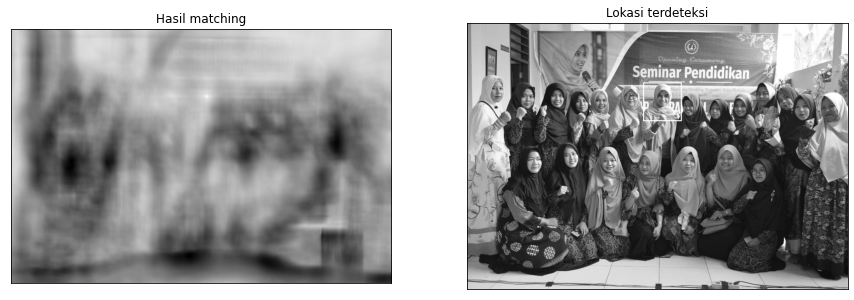

hasil metode cv2.TM_SQDIFF : 


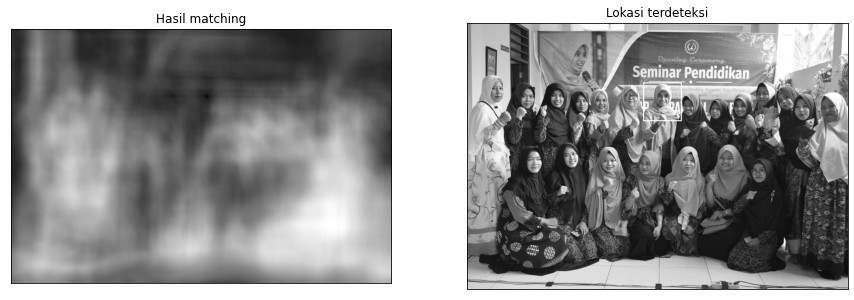

hasil metode cv2.TM_SQDIFF_NORMED : 


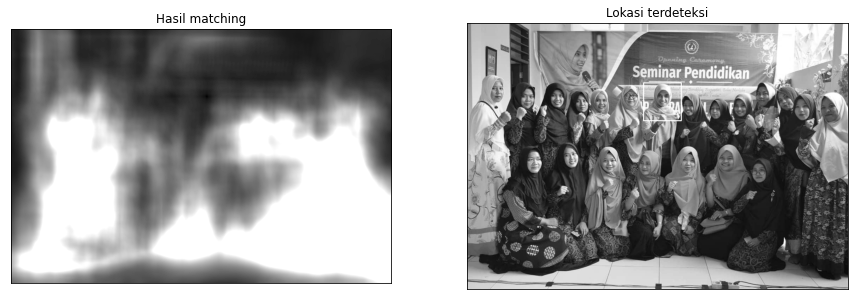

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('foto.png',0)
img2 = img.copy()
template = cv2.imread('sherly.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (15,15)

for met in methods:
    img = img2.copy()
    method = eval(met)

    # menggunakan template matching
    res = cv2.matchTemplate(img,template,method)

    # mencari ukuran citra template untuk menggambar kotak
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikit berbeda
    # sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    
    
    # buat persegi pada lokasi yang ditemukan
    cv2.rectangle(img, top_left, bottom_right, 255, 2) # 2 adalah ketebalan garis kotak

    print("hasil metode", met, ": " )
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])
    

    plt.show()